In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [29]:
train_df = pd.read_csv('/Users/jacobjones/github/datasci207_final_project/data/train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Data Cleaning

In [30]:
#replace nulls with -99
train_df = train_df.fillna(-99)
train_df["LogSalesPrice"] = np.log(train_df.SalePrice)

# Model Building (Model 1)

In [31]:
train = train_df.sample(frac=.7)
val = train_df.drop(train.index)

In [32]:
def show_history(history):
  plt.plot(history.history['loss'], color='black', label='train')
  plt.plot(history.history['val_loss'], color='red', label='val')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

In [33]:
def build_model1():
    #clear session
    tf.keras.backend.clear_session()

    #inputs
    OverallQual = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='OverallQual')
    OverallQual_binned = tf.keras.layers.Discretization(num_bins=10)(OverallQual)
    GrLivArea = tf.keras.layers.Input(shape=(1,), dtype=tf.float32, name='GrLivArea')

   
    #outputs
    LogSalesPrice = tf.keras.layers.Dense(
      units=1, activation='relu', name='LogSalesPrice')(OverallQual)

    model = tf.keras.Model(inputs=[OverallQual,GrLivArea],
                         outputs=LogSalesPrice,
                         name='HomePriceEstimate')

    model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
      loss='MSE')
    

    return model


In [34]:
# model = build_model1()
# model.summary()

# history = model.fit(
#   x={
#       'OverallQual': train[['OverallQual']],
#       'GrLivArea': train[['GrLivArea']]},
#   y=train[['LogSalesPrice']],
#   epochs=15,
#   batch_size=64,
#   validation_data=(
#       {'OverallQual': train[['OverallQual']],
#       'GrLivArea': train[['GrLivArea']]},
#       val[['LogSalesPrice']]),
#   verbose=1)

# show_history(history)

# Model 2

In [35]:
non_numeric_cols = train_df.columns[train_df.dtypes != 'int64']
train_df.loc(axis=1)[non_numeric_cols]

,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LogSalesPrice
0,RL,65.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.247694
1,RL,80.0,Pave,-99,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.109011
2,RL,68.0,Pave,-99,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.317167
3,RL,60.0,Pave,-99,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,-99,-99,-99,WD,Abnorml,11.849398
4,RL,84.0,Pave,-99,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.072541
1456,RL,85.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Unf,TA,TA,Y,-99,MnPrv,-99,WD,Normal,12.254863
1457,RL,66.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,RFn,TA,TA,Y,-99,GdPrv,Shed,WD,Normal,12.493130
1458,RL,68.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,TA,TA,Y,-99,-99,-99,WD,Normal,11.864462


In [36]:
numeric_cols_train = train_df.drop(axis=1,labels = non_numeric_cols)

In [37]:
non_numeric_cols

Index(['MSZoning', 'LotFrontage', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition',
       'LogSalesPrice'],
      dtype='object')

In [38]:
numeric_cols_train.shape

(1460, 35)

In [39]:
def build_model2():
    tf.keras.backend.clear_session()
    
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(
        units=20,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dense(
        units=15,
        activation='relu'
    ))
    
    model.add(tf.keras.layers.Dense(
        units=10,
        activation='relu'
    ))
    
    model.add(tf.keras.layers.Dense(
        units=5,
        activation='relu'
    ))

    model.compile(loss='MSE', 
            optimizer='Adam', 
            metrics=['MAE',"MAPE"])
    return model

Epoch 1/1000
19/19 [==============================] - 0s 6ms/step - loss: 38373445632.0000 - MAE: 179465.0938 - MAPE: 99.3253 - val_loss: 39250137088.0000 - val_MAE: 180532.3125 - val_MAPE: 98.9764
Epoch 2/1000
19/19 [==============================] - 0s 2ms/step - loss: 37854490624.0000 - MAE: 178088.1719 - MAPE: 98.4835 - val_loss: 38577020928.0000 - val_MAE: 178764.0000 - val_MAPE: 97.9083
Epoch 3/1000
19/19 [==============================] - 0s 2ms/step - loss: 36984213504.0000 - MAE: 175823.0312 - MAPE: 97.1194 - val_loss: 37413974016.0000 - val_MAE: 175657.9375 - val_MAPE: 96.0348
Epoch 4/1000
19/19 [==============================] - 0s 2ms/step - loss: 35417219072.0000 - MAE: 171574.7656 - MAPE: 94.5666 - val_loss: 35211776000.0000 - val_MAE: 169564.7344 - val_MAPE: 92.3584
Epoch 5/1000
19/19 [==============================] - 0s 2ms/step - loss: 32574109696.0000 - MAE: 163401.4062 - MAPE: 89.6112 - val_loss: 31290710016.0000 - val_MAE: 157903.7969 - val_MAPE: 85.3158
Epoch 6/10

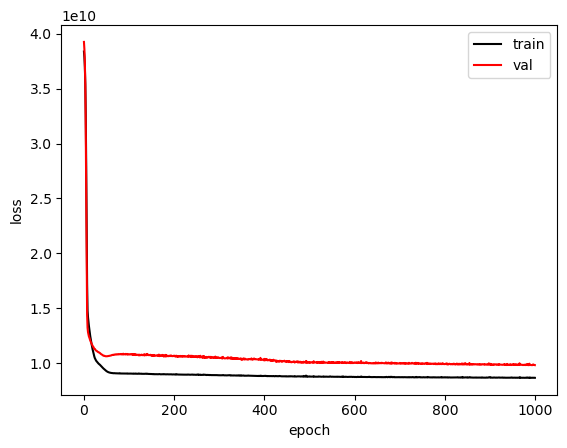

In [40]:
model2 = build_model2()
history = model2.fit(
    x=numeric_cols_train.drop(axis=1,labels="SalePrice"),
    y=numeric_cols_train.SalePrice,
    epochs=1000,
    batch_size=64,
    validation_split=.2,
    verbose=1)
show_history(history)

# Model 3

In [41]:
train_df[non_numeric_cols]

,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LogSalesPrice
0,RL,65.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.247694
1,RL,80.0,Pave,-99,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.109011
2,RL,68.0,Pave,-99,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.317167
3,RL,60.0,Pave,-99,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,TA,TA,Y,-99,-99,-99,WD,Abnorml,11.849398
4,RL,84.0,Pave,-99,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,62.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,RFn,TA,TA,Y,-99,-99,-99,WD,Normal,12.072541
1456,RL,85.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Unf,TA,TA,Y,-99,MnPrv,-99,WD,Normal,12.254863
1457,RL,66.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,RFn,TA,TA,Y,-99,GdPrv,Shed,WD,Normal,12.493130
1458,RL,68.0,Pave,-99,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,TA,TA,Y,-99,-99,-99,WD,Normal,11.864462


In [42]:
for col in non_numeric_cols:
    if train_df[col].dtype == 'object':  # Check if the column is of object type (non-numeric)
        if train_df[col].apply(lambda x: isinstance(x, (int, float))).any():  # Check if there are any numeric values
            train_df[col] = train_df[col].astype(str)  # Convert to string if there are numeric values
        label_encoder = LabelEncoder()
        train_df[col] = label_encoder.fit_transform(train_df[col])

In [43]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalesPrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,0,0,0,2,2008,8,4,208500,12.247694
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,0,0,0,5,2007,8,4,181500,12.109011
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,0,0,0,9,2008,8,4,223500,12.317167
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,0,0,0,2,2006,8,0,140000,11.849398
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,0,0,0,12,2008,8,4,250000,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,3,3,0,...,0,0,0,0,8,2007,8,4,175000,12.072541
1456,1457,20,3,85.0,13175,1,0,3,3,0,...,0,3,0,0,2,2010,8,4,210000,12.254863
1457,1458,70,3,66.0,9042,1,0,3,3,0,...,0,1,3,2500,5,2010,8,4,266500,12.493130
1458,1459,20,3,68.0,9717,1,0,3,3,0,...,0,0,0,0,4,2010,8,4,142125,11.864462


In [129]:
def train_model3():
    tf.keras.backend.clear_session()
    
    model = tf.keras.Sequential()

   # model.add(tf.keras.layers.Embedding(input_dim=80, output_dim=64, input_shape=(None,80)))

    model.add(tf.keras.layers.Dense(
        units=25,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dropout(0.05))

    model.add(tf.keras.layers.Dense(
        units=20,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dropout(0.01))

    model.add(tf.keras.layers.Dense(
        units=10,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dropout(0.01))

    model.add(tf.keras.layers.Dense(
        units=5,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dropout(0.01))
    
    model.add(tf.keras.layers.Dense(
        units=3,
        activation='relu'
    ))    
    
    model.compile(loss='MSE', 
            optimizer='Adam', 
            metrics=['MAE',"MAPE"])
    return model

Epoch 1/1000
20/20 [==============================] - 1s 8ms/step - loss: 39120629760.0000 - MAE: 180707.5469 - MAPE: 99.9136 - val_loss: 38126473216.0000 - val_MAE: 181006.7031 - val_MAPE: 99.8269
Epoch 2/1000
20/20 [==============================] - 0s 2ms/step - loss: 39008079872.0000 - MAE: 180420.2188 - MAPE: 99.7410 - val_loss: 37959360512.0000 - val_MAE: 180566.4531 - val_MAPE: 99.5611
Epoch 3/1000
20/20 [==============================] - 0s 2ms/step - loss: 38758105088.0000 - MAE: 179782.0000 - MAPE: 99.3577 - val_loss: 37586096128.0000 - val_MAE: 179566.9844 - val_MAPE: 98.9540
Epoch 4/1000
20/20 [==============================] - 0s 2ms/step - loss: 37957177344.0000 - MAE: 177709.7656 - MAPE: 98.1077 - val_loss: 36115705856.0000 - val_MAE: 175565.6875 - val_MAPE: 96.5215
Epoch 5/1000
20/20 [==============================] - 0s 2ms/step - loss: 35648339968.0000 - MAE: 171383.8438 - MAPE: 94.2856 - val_loss: 32421189632.0000 - val_MAE: 164876.6406 - val_MAPE: 90.0064
Epoch 6/10

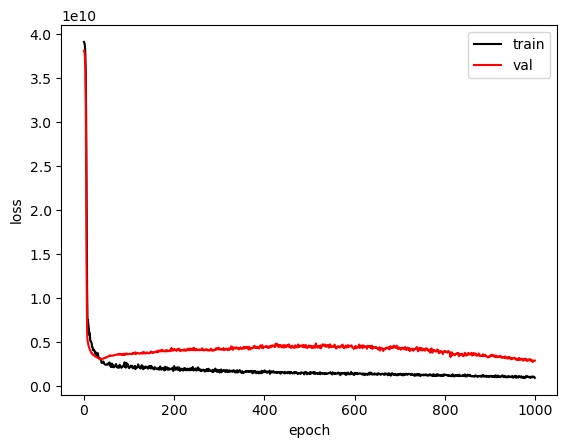

In [130]:
model3 = train_model3()
history = model3.fit(
    x=train_df.drop(axis=1,labels=["SalePrice","LogSalesPrice"]),
    y=train_df.SalePrice,
    epochs=1000,
    batch_size=64,
    validation_split=.15,
    verbose=1)
show_history(history)

# Model 4 Random Forest 

In [111]:
model4 = RandomForestRegressor(n_estimators=30)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(axis=1,labels=["SalePrice","LogSalesPrice"]), train_df.SalePrice, test_size=0.15)

In [113]:
model4.fit(
    X=X_train,
    y=y_train)
model4.score(X_test,y_test)

0.88200657801679

In [114]:
predictions = model4.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 16068.89162861492


# Model 5 XGBoost

In [132]:
import xgboost as xgb

In [147]:
xgb_model = xgb.XGBRegressor(n_estimators=100)

xgb_model.fit(X_train, y_train)


score = xgb_model.score(X_test, y_test)

print("XGBoost Model Score:", score)

XGBoost Model Score: 0.862902334111814


In [148]:
predictions = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print("Mean Absolute Error:", mae)

Mean Absolute Error: 15995.11957762557


# Model 6

In [248]:
def train_model6():
    tf.keras.backend.clear_session()
    
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(
        units=5,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dropout(0.025))

    model.add(tf.keras.layers.Dense(
        units=5,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dropout(0.025))
    model.compile(loss='MAE', 
            optimizer='Adam', 
            metrics=['MSE',"MAPE"])
    return model

Epoch 1/2000
20/20 [==============================] - 0s 6ms/step - loss: 179645.9531 - MSE: 38700781568.0000 - MAPE: 99.2780 - val_loss: 179831.6094 - val_MSE: 37682012160.0000 - val_MAPE: 99.1135
Epoch 2/2000
20/20 [==============================] - 0s 2ms/step - loss: 179203.3125 - MSE: 38536151040.0000 - MAPE: 99.0021 - val_loss: 179300.3438 - val_MSE: 37483339776.0000 - val_MAPE: 98.7900
Epoch 3/2000
20/20 [==============================] - 0s 2ms/step - loss: 178659.2344 - MSE: 38328504320.0000 - MAPE: 98.6694 - val_loss: 178670.9531 - val_MSE: 37248372736.0000 - val_MAPE: 98.4082
Epoch 4/2000
20/20 [==============================] - 0s 3ms/step - loss: 178004.6250 - MSE: 38079459328.0000 - MAPE: 98.2769 - val_loss: 177944.7656 - val_MSE: 36979535872.0000 - val_MAPE: 97.9676
Epoch 5/2000
20/20 [==============================] - 0s 2ms/step - loss: 177252.5156 - MSE: 37801549824.0000 - MAPE: 97.8096 - val_loss: 177119.0938 - val_MSE: 36676321280.0000 - val_MAPE: 97.4665
Epoch 6/20

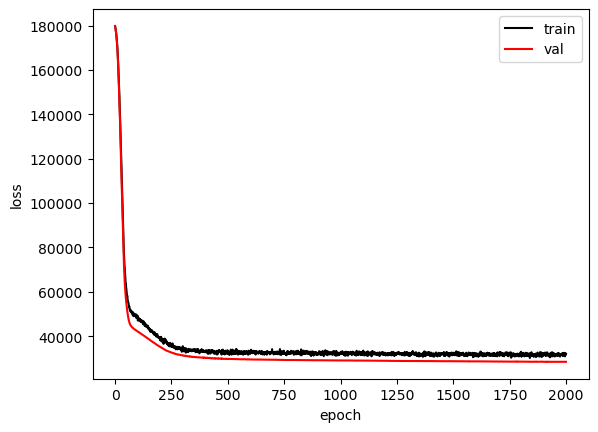

In [249]:
model6 = train_model6()
history = model6.fit(
    x=train_df.drop(axis=1,labels=["SalePrice","LogSalesPrice"]),
    y=train_df.SalePrice,
    epochs=2000,
    batch_size=64,
    validation_split=.15,
    verbose=1)
show_history(history)